In [743]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from Funciones.eda_f import *
import warnings
warnings.filterwarnings("ignore")

## **EDA**

**OPERACIONES REALIZADAS**

Para el análisis exploratorio de los datasets, se tiene inicialmente quince datasets. Se seleccionarán aquellos que sirvan para el posterior análisis.

**SELECCIÓN DE DATASETS**

Para el análisis exploratorio de los datasets, se proporcionaron los datasets del ENACOM referentes al 'Acceso a Internet', estos datasets al revisarlos contenían registros erróneos, en su gran mayoría, se encontraban con una escala equivocada en sus registros y por ello, no se les importo por medio de la API, la única excepción fue para el dataset denominado 'Acceso a Internet Fijo por rangos de velocidad de bajada y provincia', el cual si se llego a importar por medio del API.

En total se cuenta con nueve (9) datasets iniciales, divididos en ocho (8) datasets importados manualmente y un (1) dataset importado por el API. Se seleccionarán aquellos que sirvan para el posterior análisis. Los datasets son:

In [744]:
# Carga y lectura de "Internet_Penetracion"
df_internet_fijo = pd.read_excel("Datasets/Raw Data/Internet_Penetracion.xlsx",sheet_name=None)
# Separación de hojas en dataframes
df_internet_fijo_nacional = df_internet_fijo['Penetracion-totales']
df_internet_fijo_provincias_personas = df_internet_fijo['Penetración-poblacion']
df_internet_fijo_provincias_hogares = df_internet_fijo['Penetracion-hogares']

# Carga y lectura de "Accesos bandas"
df_bandas = pd.read_excel("Datasets/Raw Data/Accesos bandas.xlsx",sheet_name=None)
# Separación de hojas en dataframes
df_accesos_bandas_nacional = df_bandas['Totales']
df_accesos_bandas_provincias = df_bandas['Dial-BAf']

# Carga y lectura de "Internet_Accesos-por-tecnologia"
df_accesos_tecnologia = pd.read_excel("Datasets/Raw Data/Internet_Accesos-por-tecnologia.xlsx",sheet_name=None)
# Separación de hojas en dataframes
df_accesos_tecnologia_nacional = df_accesos_tecnologia['Totales']
df_accesos_tecnologia_provincias = df_accesos_tecnologia['Accesos Por Tecnología']

# Carga y lectura de "historico_velocidad_internet"
df_velocidad_media_bajada = pd.read_excel("Datasets/Raw Data/historico_velocidad_internet.xlsx",sheet_name=None)
# Separación de hojas en dataframes
df_velocidad_media_bajada_nacional = df_velocidad_media_bajada['Totales']
df_velocidad_media_bajada_provincias = df_velocidad_media_bajada['Velocidad % por prov']

# Carga y lectura de "Internet_Accesos-por-velocidad"
df_rangos_velocidad_bajada = pd.read_excel("Datasets/Raw Data/Internet_Accesos-por-velocidad.xlsx",sheet_name=None)
# Hoja de 'Totales' a un dataframe
df_rangos_velocidad_bajada_nacional = df_rangos_velocidad_bajada['Totales']

# Importación de un dataset por medio de una API
url = 'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.csv/?auth_key=ENtEJbrvzEDEtk6TK43nmgyAM00eljVlBD5hSBS0'
response = requests.get(url)
datos = response.content.decode('utf-8')
df_rangos_velocidad_bajada_provincias = pd.read_csv(io.StringIO(datos),encoding='utf-8')

# Carga y lectura de "Internet_Ingresos"
df_ingresos_internet = pd.read_excel("Datasets/Raw Data/Internet_Ingresos.xlsx")

# Carga y lectura de "Internet_Accesos-por-tecno_por_loc"
df_accesos_tecnologia_localidad = pd.read_excel("Datasets/Raw Data/Internet-Accesos-por-tecno_por_loc.xlsx")

# Carga y lectura de "mapa_conectividad"
df_velocidad_localidad = pd.read_excel("Datasets/Raw Data/Internet_Accesos-por-velocidad_por loc.xlsx")

# Carga y lectura de "mapa_conectividad"
df_conectividad_internet_localidades = pd.read_excel("Datasets/Raw Data/mapa_conectividad.xlsx")

**Penetración de Internet fijo (Hogares/Personas) - Nacional**

- El dataset contiene registros sobre el acceso de internet fijo por cada 100 hogares y por cada 100 habitantes a nivel nacional, separados por trimestres desde 2014 hasta 2022

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [745]:
df_internet_fijo_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [746]:
df_internet_fijo_nacional.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021


In [747]:
print(conteo_nulos_duplicados(df_internet_fijo_nacional))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Penetración de Internet fijo (Hogares/Personas) - Provincias**

- En este caso se tiene dos datasets similares, que contienen registros sobre el acceso de internet fijo por cada 100 hogares y por cada 100 habitantes a nivel provincial por lo cual se decidió crear un nuevo df que incluya ambos datos.

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [748]:
print(df_internet_fijo_provincias_hogares.info())
print(df_internet_fijo_provincias_personas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       864 non-null    int64  
 1   Trimestre                 864 non-null    int64  
 2   Provincia                 864 non-null    object 
 3   Accesos por cada 100 hab  864 non-null    float64
dtypes: float64(1), int64(2), object(1)


In [749]:
df_internet_fijo_provincias = df_internet_fijo_provincias_hogares
df_internet_fijo_provincias['Accesos por cada 100 hab'] = df_internet_fijo_provincias_personas['Accesos por cada 100 hab']
df_internet_fijo_provincias

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,78.940000,26.720000
1,2022,4,Capital Federal,122.730000,50.350000
2,2022,4,Catamarca,65.770000,16.730000
3,2022,4,Chaco,43.620000,11.660000
4,2022,4,Chubut,85.570000,26.230000
...,...,...,...,...,...
859,2014,1,Santa Cruz,28.939093,8.677327
860,2014,1,Santa Fe,47.847663,15.077801
861,2014,1,Santiago Del Estero,16.309924,4.058899
862,2014,1,Tierra Del Fuego,63.965926,19.104921


In [750]:
df_internet_fijo_provincias.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,78.94,26.72
1,2022,4,Capital Federal,122.73,50.35
2,2022,4,Catamarca,65.77,16.73
3,2022,4,Chaco,43.62,11.66
4,2022,4,Chubut,85.57,26.23


In [751]:
print(conteo_nulos_duplicados(df_internet_fijo_provincias))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Accesos a Internet fijo por bandas - Nacional**

- El dataset contiene registros sobre el acceso de internet fijo por banda ancha y banda angosta (Dial up) a nivel nacional, junto con la suma de estas (Total), separados por trimestres desde 2014 hasta 2022

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [752]:
df_accesos_bandas_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [753]:
df_accesos_bandas_nacional.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022
3,2022,1,10611390,12619,10624009,Ene-Mar 2022
4,2021,4,10476933,12861,10489794,Oct-Dic 2021


In [754]:
print(conteo_nulos_duplicados(df_accesos_bandas_nacional))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Accesos a Internet fijo por bandas - Provincias**

- El dataset contiene registros sobre el acceso de internet fijo por banda ancha y banda angosta (Dial up) a nivel provincial, junto con la suma de estas (Total), separados por trimestres desde 2014 hasta 2022

- Se encuentran registros nulos, y se le imputa, en este caso, el valor de (0)

- No se encuentran registros duplicados

In [755]:
df_accesos_bandas_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [756]:
df_accesos_bandas_provincias.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [757]:
conteo_nulos_duplicados(df_accesos_bandas_provincias)

['La cantidad de registros vacios es: 2',
 'La cantidad de registros duplicados es: 0']

Al encontrar registros nulos, se les ubica para analizar el tratamiento a darles

In [758]:
registros_nulos = df_accesos_bandas_provincias[df_accesos_bandas_provincias.isnull().any(axis=1)]
registros_nulos

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


En este caso se imputa en lugar del valor nulo, un valor de '0'

In [759]:
df_accesos_bandas_provincias.fillna(0, inplace=True)

**Accesos a Internet fijo por tecnología - Nacional**

- El dataset contiene registros sobre el acceso de internet fijo por tecnología ('ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros') a nivel nacional, junto con la suma de estas (Total), separados por trimestres desde 2014 hasta 2022

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [760]:
df_accesos_tecnologia_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


In [761]:
df_accesos_tecnologia_nacional.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [762]:
print(conteo_nulos_duplicados(df_accesos_tecnologia_nacional))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Accesos a Internet fijo por tecnología - Provincias**

- El dataset contiene registros sobre el acceso de internet fijo por tecnología ('ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros') a nivel provincial, junto con la suma de estas (Total), separados por trimestres desde 2014 hasta 2022

- Se encuentran registros nulos, y en este caso se eliminan

- No se encuentran registros duplicados

In [763]:
df_accesos_tecnologia_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   25 non-null     object 
 12  Unnamed: 12   25 non-null     float64
 13  Unnamed: 13   25 non-null     float64
 14  Unnamed: 14   25 non-null     float64
 15  Unnamed: 15   25 non-null     float64
 16  Unnamed: 16   25 non-null     float64
 17  Unnamed: 17   25 non-null     float64
dtypes: float64(14), object(4)
memo

In [764]:
df_accesos_tecnologia_provincias.head(10)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,NaN,NaN,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0,NaN,NaN,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0,NaN,NaN,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0,NaN,NaN,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0,NaN,NaN,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0
5,2022,4,Córdoba,152265.0,456947.0,367393.0,61631.0,11424.0,1049660.0,NaN,NaN,Córdoba,152265.0,456947.0,367393.0,61631.0,11424.0,1049660.0
6,2022,4,Corrientes,34038.0,80283.0,26752.0,9082.0,5298.0,155453.0,NaN,NaN,Corrientes,34038.0,80283.0,26752.0,9082.0,5298.0,155453.0
7,2022,4,Entre Ríos,55507.0,135746.0,40798.0,26414.0,12509.0,270974.0,NaN,NaN,Entre Ríos,55507.0,135746.0,40798.0,26414.0,12509.0,270974.0
8,2022,4,Formosa,13735.0,17068.0,13118.0,17692.0,227.0,61840.0,NaN,NaN,Formosa,13735.0,17068.0,13118.0,17692.0,227.0,61840.0
9,2022,4,Jujuy,17880.0,52390.0,42626.0,4067.0,1255.0,118218.0,NaN,NaN,Jujuy,17880.0,52390.0,42626.0,4067.0,1255.0,118218.0


Se encuentran columnas con registros que no pertenecen al dataset y se seleccionan solo aquellas que sirvan para el posterior analisis

In [765]:
df_accesos_tecnologia_provincias = df_accesos_tecnologia_provincias[['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']]

In [766]:
conteo_nulos_duplicados(df_accesos_tecnologia_provincias)

['La cantidad de registros vacios es: 16',
 'La cantidad de registros duplicados es: 0']

Al encontrar registros nulos, se les ubica para analizar el tratamiento a darles

In [767]:
registros_nulos = df_accesos_tecnologia_provincias[df_accesos_tecnologia_provincias.isnull().any(axis=1)]
registros_nulos

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este caso, los registros no corresponden al dataset y son eliminados, de igual manera se visualiza que existen registros con una terminación ( *) que seran corregidos

In [768]:
df_accesos_tecnologia_provincias.dropna(inplace=True)
df_accesos_tecnologia_provincias['Año'] = df_accesos_bandas_provincias['Año'].astype(int)
df_accesos_tecnologia_provincias['Trimestre'] = df_accesos_bandas_provincias['Trimestre'].astype(int)

**Accesos a Internet fijo por tecnología - Localidades**

- El dataset contiene registros sobre el acceso de internet fijo por tecnología ('ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Wimax', 'Satelital') a nivel localidad, junto con la suma de estas (Total), del último trimestre del 2022.

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [769]:
df_accesos_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 318.7+ KB


In [770]:
df_accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [771]:
conteo_nulos_duplicados(df_accesos_tecnologia_localidad)

['La cantidad de registros vacios es: 0',
 'La cantidad de registros duplicados es: 0']

**Velocidad media de bajada de Intenet fijo - Nacional**

- El dataset contiene registros sobre la velocidad media de bajada (Mbps) a nivel nacional, separados por trimestres desde 2014 hasta 2022.

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [772]:
df_velocidad_media_bajada_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [773]:
df_velocidad_media_bajada_nacional.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022
3,2022,1,55.11,Ene-Mar 2022
4,2021,4,52.34,Oct-Dic 2021


In [774]:
print(conteo_nulos_duplicados(df_velocidad_media_bajada_nacional))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Velocidad media de bajada de Intenet fijo - Provincias**

- El dataset contiene registros sobre la velocidad media de bajada (Mbps) a nivel provincial, separados por trimestres desde 2014 hasta 2022.

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [775]:
df_velocidad_media_bajada_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [776]:
df_velocidad_media_bajada_provincias.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [777]:
print(conteo_nulos_duplicados(df_velocidad_media_bajada_provincias))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Accesos a Intenet fijo por velocidad de bajada- Nacional**

- El dataset contiene registros sobre los accesos a internet fijo por rangos de velocidad de bajada a nivel nacional, separados por trimestres desde 2014 hasta 2022.

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [778]:
df_rangos_velocidad_bajada_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      36 non-null     int64
 1   Trimestre                36 non-null     int64
 2   Hasta 512 kbps           36 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 8   Más de 30 Mbps           36 non-null     int64
 9   OTROS                    36 non-null     int64
 10  Total                    36 non-null     int64
dtypes: int64(11)
memory usage: 3.2 KB


In [779]:
df_rangos_velocidad_bajada_nacional.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


In [780]:
print(conteo_nulos_duplicados(df_rangos_velocidad_bajada_nacional))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Accesos a Intenet fijo por velocidad de bajada - Provincias**

- El dataset contiene registros sobre los accesos a internet fijo por rangos de velocidad de bajada a nivel provincial, separados por trimestres desde 2014 hasta 2022.

- Se encuentran registros nulos en la columna 'OTROS', en este caso se imputa el valor (0)

- No se encuentran registros duplicados

In [781]:
df_rangos_velocidad_bajada_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


In [782]:
df_rangos_velocidad_bajada_provincias.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


In [783]:
print(conteo_nulos_duplicados(df_rangos_velocidad_bajada_provincias))

['La cantidad de registros vacios es: 6', 'La cantidad de registros duplicados es: 0']


Al encontrar registros nulos, se les ubica para analizar el tratamiento a darles

In [784]:
registros_nulos = df_rangos_velocidad_bajada_provincias[df_rangos_velocidad_bajada_provincias.isnull().any(axis=1)]
registros_nulos

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
337,2019,2,Capital Federal,74.0,1.027,281.370,124.087,239.691,296.155,475.991,NaN,1.418.395
347,2019,2,La Rioja,9.0,11.000,39.819,4.297,4.857,13.000,1.298,NaN,50.304
348,2019,2,Mendoza,20.0,2.522,205.165,2.971,10.092,1.256,234,NaN,222.260
355,2019,2,Santa Cruz,25.0,84.000,24.861,3.806,1.202,28.000,4,NaN,30.010
358,2019,2,Tierra Del Fuego,6.0,123.000,41.824,4.241,1.573,96.000,32,NaN,47.895
359,2019,2,Tucumán,16.0,157.000,78.891,44.296,24.291,628.000,18.394,NaN,166.673


En este caso se imputa en lugar del valor nulo, un valor de '0'

In [785]:
df_rangos_velocidad_bajada_provincias.fillna(0, inplace=True)

**Ingresos por la prestación de servicio de Internet Fijo - Nacional**

- El dataset contiene registros sobre los ingresos (miles de pesos) por la prestación de servicio de internet fijo a nivel nacional, separados por trimestres desde 2014 hasta 2022.

- No se encuentran registros nulos

- No se encuentran registros duplicados

In [786]:
df_ingresos_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [787]:
df_ingresos_internet.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [788]:
print(conteo_nulos_duplicados(df_ingresos_internet))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Accesos a Internet fijo por velocidad de bajada - Localidades**

- El dataset contiene registros sobre los accesos a internet fijo según la velocidad de bajada a nivel localidad, del último trimestre del 2022.

- Se encontraron registros vacios, en toda el dataset, se decidió reemplazarlos por (0).

- No se encuentran registros duplicados

In [789]:
df_velocidad_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Columns: 134 entries, Provincia to Total general
dtypes: float64(130), object(4)
memory usage: 3.2+ MB


In [790]:
df_velocidad_localidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Se pueden observar la presencia de registros nulos en el dataset por lo cual se decide imputar un valor de (0) en este caso.

In [791]:
df_velocidad_localidad.fillna(0,inplace=True)

Se comprueban los cambios realizados:

In [792]:
print(conteo_nulos_duplicados(df_velocidad_localidad))

['La cantidad de registros vacios es: 0', 'La cantidad de registros duplicados es: 0']


**Localidades con conectividad a internet - Localidades**

- El dataset contiene registros sobre las localidades con conectividad a internet ('ADSL', 'Cablemodem', 'Fibra óptica', 'Satelital','Wireless', 'Telefonía Fija', '3G', '4G') a nivel localidad, separados por trimestres desde 2014 hasta 2022.

- Se encontraron registros vacios, en la columna ('Link'), que fueron reemplazados por ('Sin Dato')

- No se encuentran registros duplicados

In [793]:
df_conectividad_internet_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [794]:
df_conectividad_internet_localidades.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949


In [795]:
print(conteo_nulos_duplicados(df_conectividad_internet_localidades))

['La cantidad de registros vacios es: 12', 'La cantidad de registros duplicados es: 0']


Al encontrar registros nulos, se les ubica para analizar el tratamiento a darles

In [796]:
registros_nulos = df_conectividad_internet_localidades[df_conectividad_internet_localidades.isnull().any(axis=1)]
registros_nulos

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,--,--,--,--,--,--,--,--,--,NaN,-77.874009,-34.626560
3113,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,--,--,--,--,--,--,--,--,--,NaN,-64.895348,-62.870538
3114,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,--,--,--,--,--,--,--,--,--,NaN,-62.238369,-58.667544
3115,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,--,--,--,--,--,--,--,--,SI,NaN,-63.397393,-56.997322
3116,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,--,--,--,--,--,--,--,SI,SI,NaN,-64.240614,-56.625096
3117,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,--,--,--,--,--,--,--,--,--,NaN,-64.975862,-60.070679
3118,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,--,--,--,--,--,--,--,--,--,NaN,-60.737817,-44.737660
3119,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,--,--,--,--,--,--,--,--,--,NaN,-68.130070,-67.101330
3120,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,--,--,--,--,--,--,--,--,--,NaN,-62.594350,-59.919054
3121,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,--,--,--,--,--,--,--,--,--,NaN,-62.975332,-60.698223


En este caso se imputa en lugar del valor nulo, un valor de 'Sin Datos', estos debido a que no hay datos para la provincia de 'Tierra del fuego' y en el partido de 'Antartida'

In [797]:
df_conectividad_internet_localidades.fillna('Sin Datos', inplace=True)

**DATASETS SELECCIONADOS**

- df_internet_fijo_nacional
- df_internet_fijo_provincias
- df_accesos_tecnología nacional
- df_accesos_tecnología_provincias
- df_rangos_velociadades_provincias

**ANÁLISIS DE GRÁFICOS POR DATASETS**

De los datasets seleccionados, se realizará un análisis independiente para cada dataset y gráfico establecido.

**df_internet_fijo_nacional**

- Gráfico 1 - 2: Gráfico de lineas (Accesos Internet fijo por cada 100 hogares y Accesos Internet fijo por cada 100 habitantes)

    El gráfico de lineas de accesos a internet fijo por cada 100 hogares, muestra como los registros se comportan a lo largo del tiempo, en este caso cada trimestre.

    Se puede ver que siguen una tendencia ascendente a lo largo de los años, se observa que desde el 2014 al 2022, se incremento aproximadamente la mitad de los accesos desde el 2014.

    Así mismo se logra observar, un punto de inflexión en el ultimo trimestre del 2019 y el primer trimestre del 2020, esto principalmente se debe a la pandemia, por lo cual los accesos se vieron disminuidos durante esa época.

    No se encontraron outliers.

Grafico 1 y 2: 'Accesos Intenet Fijo por cada 100 hogares' y 'Accesos Internet Fijo por cada 100 habitantes'

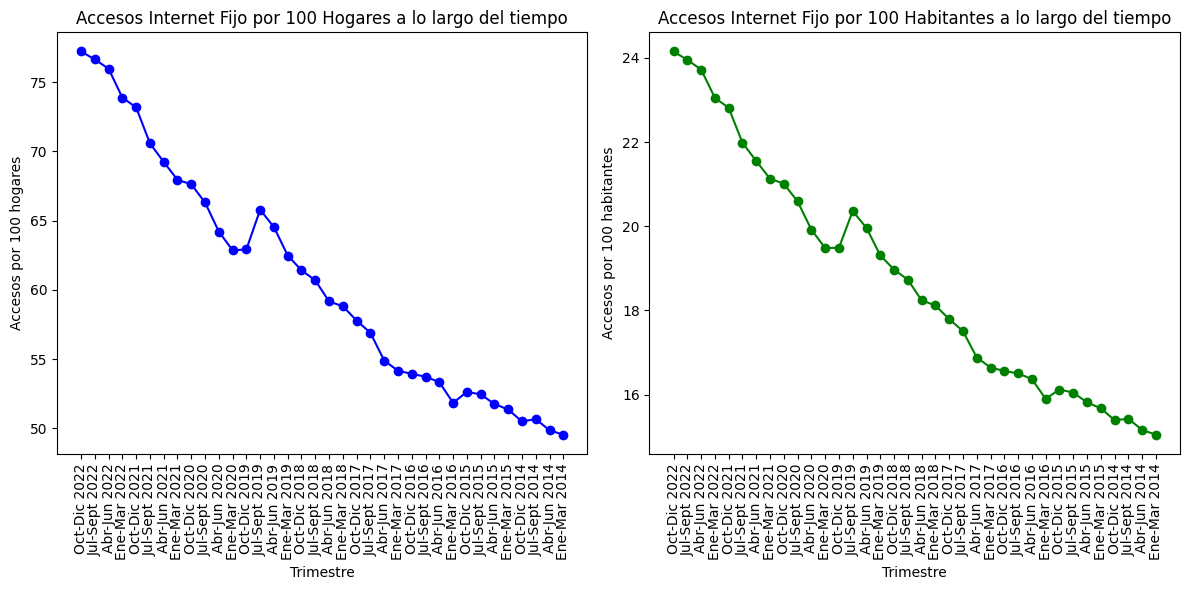

In [798]:
# Tamaño de gráfico
plt.figure(figsize=(12, 6))

# Gráfico para "Accesos Intenet Fijo por cada 100 hogares"
ax1 = plt.subplot(121)
ax1.plot(df_internet_fijo_nacional['Periodo'],df_internet_fijo_nacional['Accesos por cada 100 hogares'], marker='o', linestyle='-', color='b')
ax1.set_xticklabels(df_internet_fijo_nacional['Periodo'], rotation=90)
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Accesos por 100 hogares')
ax1.set_title('Accesos Internet Fijo por 100 Hogares a lo largo del tiempo')

# Gráfico para "Accesos Internet Fijo por cada 100 habitantes"
ax2 = plt.subplot(122)
ax2.plot(df_internet_fijo_nacional['Periodo'],df_internet_fijo_nacional['Accesos por cada 100 hab'], marker='o', linestyle='-', color='g')
ax2.set_xticklabels(df_internet_fijo_nacional['Periodo'], rotation=90)
ax2.set_xlabel('Trimestre')
ax2.set_ylabel('Accesos por 100 habitantes')
ax2.set_title('Accesos Internet Fijo por 100 Habitantes a lo largo del tiempo')

# Se ajusta la disposición de los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

In [799]:
outliers(df_internet_fijo_nacional,'Accesos por cada 100 hogares')

['No se encontraron outliers']

In [800]:
outliers(df_internet_fijo_nacional,'Accesos por cada 100 hab')

['No se encontraron outliers']

**df_internet_fijo_provincias**

- Gráfico 1: Boxplot de accesos por provincia (Hogares).

    Respecto al boxplot de accesos por cada 100 hogares, se tiene inicialmente, agrupados por provincias los registros de los accesos. 
    
    Se puede notar que en la Capital Federal se tienen valores más altos respecto a las demás provincias, esto debido a la demografía de la Capital Federal, por eso mismo estos valores no serán considerados como outliers.

    De igual manera la variabilidad, de las provincias (Catamarca, Córdoba, Jujuy, La pampa, La Rioja, San Luis, Santiago del Estero y Tierra del Fuego), es bastante notoria por el hecho que las cajas y bigotes son bastante amplios, esto se evidencia por el crecimiento acelerado que ha tenido estas provincias, de igual manera se mantienen dentro de sus límites los datos y no se encuentran valores atípicos.

    Respecto a las demás provincias no tienen una variabilidad muy pronunciada y han ido incrementado constantemente sus valores cada año. Exceptuando el caso de dos provincias, Mendoza y Neuquén que si se encuentran valores que se escapan de los bigotes, que en un principio serían considerados como anómalos, pero al revisar los valores de estas provincias, solo han tenido un crecimiento acelerado en los accesos en los ultimos trimestres, por lo cual no se consideran como outliers.

- Gráfico 2: Boxplot de accesos por provincia (Habitantes)

    Respecto al boxplot de accesos por cada 100 habitantes, se tiene inicialmente, agrupados por provincias los registros de los accesos. 
    
    Se puede notar que en la Capital Federal se tienen valores más altos respecto a las demás provincias, esto debido a la demografía de la Capital Federal, por eso mismo estos valores no serán considerados como outliers.

    De igual manera la variabilidad, de las provincias (Catamarca, Chutbut, Córdoba, Jujuy, La pampa, La Rioja, San Luis, Santiago del Estero y Tierra del Fuego), es bastante notoria por el hecho que las cajas y bigotes son bastante amplios, esto se evidencia por el crecimiento acelerado que ha tenido estas provincias, de igual manera se mantienen dentro de sus límites los datos y no se encuentran valores atípicos.

    Respecto a las demás provincias no tienen una variabilidad muy pronunciada y han ido incrementado constantemente sus valores cada año. Exceptuando el caso de tres provincias, Capital Federal, Mendoza y Neuquén que si se encuentran valores que se escapan de los bigotes, que en un principio serían considerados como anómalos, pero al revisar los valores de estas provincias, solo han tenido un crecimiento acelerado en los accesos en los ultimos trimestres, por lo cual no se consideran como outliers.

Gráfico 1: Boxplot de accesos por provincia (Hogares).

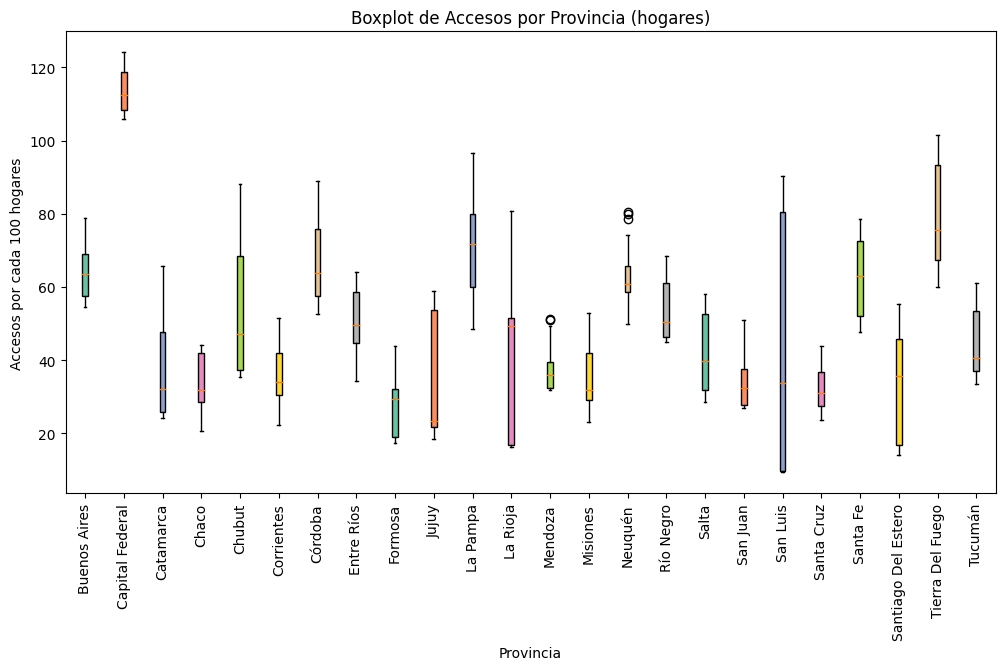

In [801]:
#Se crea un boxplot para cada provincia
plt.figure(figsize=(12, 6))
colores = sns.color_palette("Set2")

posiciones = []
etiquetas = []

# Se crea un boxplot para cada provincia
for i, (provincia, datos) in enumerate(df_internet_fijo_provincias.groupby('Provincia')):
    posiciones.append(i + 1)
    etiquetas.append(provincia)

    plt.boxplot(datos['Accesos por cada 100 hogares'], positions=[i + 1], patch_artist=True,
                boxprops={'facecolor': colores[i % len(colores)]})

plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Boxplot de Accesos por Provincia (hogares)')
plt.xticks(posiciones, etiquetas, rotation=90)
plt.show()

Gráfico 2: Boxplot de accesos por provincia (Habitantes).

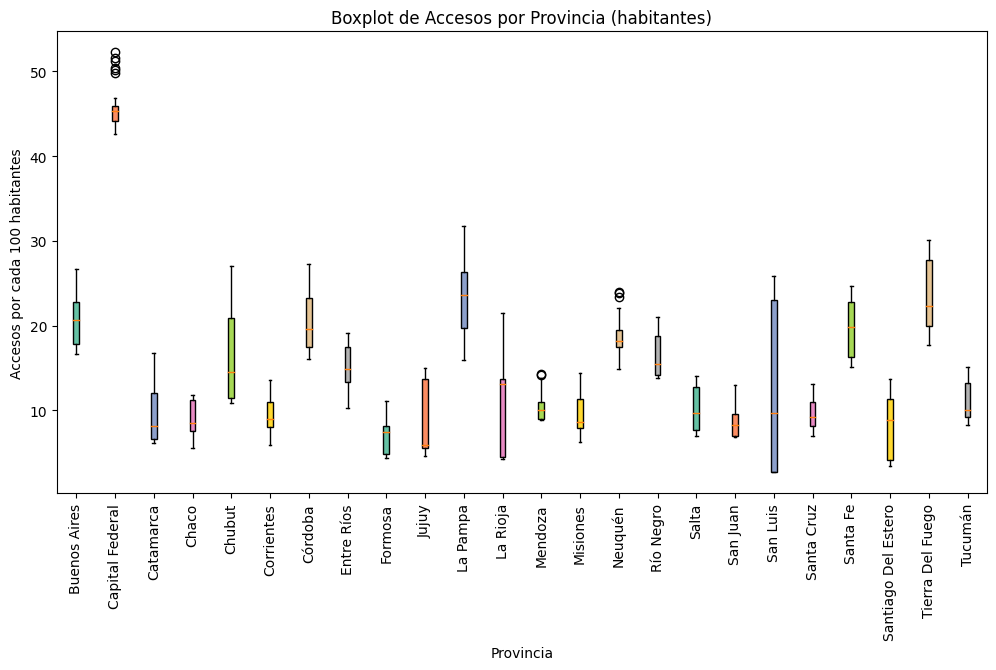

In [802]:
# Se crea un boxplot para cada provincia
plt.figure(figsize=(12, 6))
colores = sns.color_palette("Set2")

posiciones = []
etiquetas = []

# Se crea un boxplot para cada provincia
for i, (provincia, datos) in enumerate(df_internet_fijo_provincias.groupby('Provincia')):
    posiciones.append(i + 1)
    etiquetas.append(provincia)

    plt.boxplot(datos['Accesos por cada 100 hab'], positions=[i + 1], patch_artist=True,
                boxprops={'facecolor': colores[i % len(colores)]})  

plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Boxplot de Accesos por Provincia (habitantes)')
plt.xticks(posiciones, etiquetas, rotation=90)  
plt.show()

In [803]:
outliers(df_internet_fijo_provincias,'Accesos por cada 100 hogares').head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
1,2022,4,Capital Federal,122.730000,50.350000
25,2022,3,Capital Federal,122.280000,50.220000
49,2022,2,Capital Federal,121.310000,49.873561
481,2017,4,Capital Federal,122.897424,51.616721
505,2017,3,Capital Federal,121.858326,51.244450


In [804]:
outliers(df_internet_fijo_provincias,'Accesos por cada 100 hab').head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
1,2022,4,Capital Federal,122.730000,50.350000
25,2022,3,Capital Federal,122.280000,50.220000
49,2022,2,Capital Federal,121.310000,49.873561
73,2022,1,Capital Federal,111.797863,46.014348
97,2021,4,Capital Federal,111.270026,45.848511


**df_accesos_tecnología_nacional**

- Gráfico 1: Gráfico de lineas (Conexiones por tipo en el último trimestre de cada año)

    El gráfico de lineas de accesos por tecnología, muestra como los registros se comportan a lo largo del tiempo, en este caso cada cuarto trimestre del año.

    Se puede ver que existe una tendencia ascendente pronunciada para la conexión 'Cablemodem', desde el 2014 hasta el 2021, donde se incrementaron más que el doble de conexiones que tenian en un principio, como punto a tomar en cuenta respecto al 2022, esta tendencia se normalizó.

    De igual manera existe una tendencia ascendente para la conexión de 'Fibra óptica', que seguía una tendencia estática del periodo 2014 al 2017, donde se incremento considetablemente desde el 2018 hasta el 2022, pasando a ser la segunda conexión más utilizada.

    Para las conexiones 'Wireless' y 'Otros' se mantuvo una tendencia estática desde el 2014 al 2022, se incremento ligeramente las conexiones durante estos años.

    El cambio más notorio respecto a una tendencia descendente es la conexión ADSL, que paso de ser la conexión más utilizada a ser la tercera, desde el 2014 al 2022, esto debido al incremento de conexiones principalmente de tipo 'Cablemodem' y 'Fibra óptica'.

    No se encontraron outliers
    

Gráfico 1: Conexiones por tipo en el último trimestre de cada año

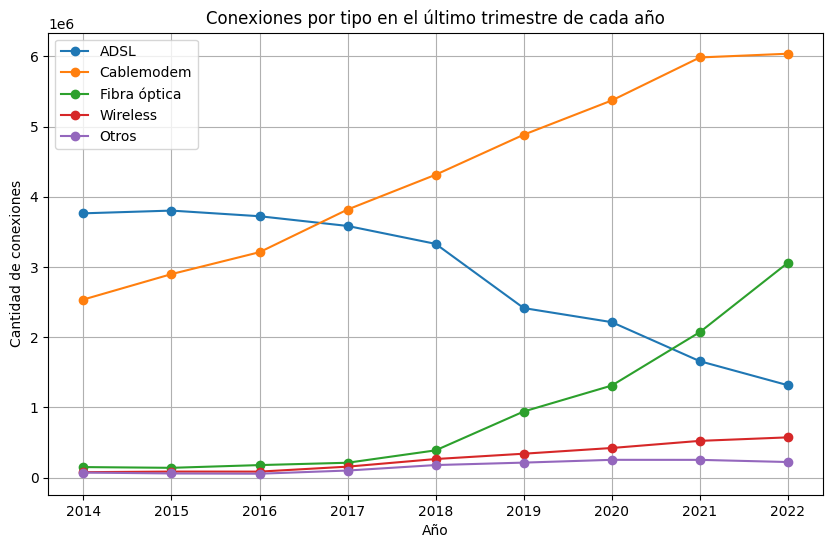

In [805]:
# Se filtra los registros del último trimestre de cada año
last_quarters = df_accesos_tecnologia_nacional[df_accesos_tecnologia_nacional['Trimestre'] == 4]

# Crear un gráfico de líneas para cada tipo de conexión
plt.figure(figsize=(10, 6))

# Lista de tipos de conexión
connection_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

for connection_type in connection_types:
    plt.plot(last_quarters['Año'], last_quarters[connection_type], marker='o', label=connection_type)

plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones')
plt.title('Conexiones por tipo en el último trimestre de cada año')
plt.legend()
plt.grid(True)
plt.show()

In [806]:
df_accesos_tecnologia_nacional.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [807]:
print(outliers(df_accesos_tecnologia_nacional,'ADSL'))
print(outliers(df_accesos_tecnologia_nacional,'Cablemodem'))
print(outliers(df_accesos_tecnologia_nacional,'Fibra óptica'))
print(outliers(df_accesos_tecnologia_nacional,'Wireless'))
print(outliers(df_accesos_tecnologia_nacional,'Otros'))

['No se encontraron outliers']
['No se encontraron outliers']
['No se encontraron outliers']
['No se encontraron outliers']
['No se encontraron outliers']


**df_accesos_tecnología_provincias**

En este caso se decide realizar dos gráficas del mismo tipo, la gráfica 1 considera a todas las provincias, y la gráfica 2 aquellas provincias con una menor cantidad de conexiones, para poder visualizar de mejor manera la distribución en cada una de ellas.

- Gráfico 1: Gráfico de barras apiladas (Conexiones por provincia)

    El gráfico de barras apiladas representa las cantidades totales de conexiones por provincia para el último trimestre del 2022. Estas barras están divididas por el tipo de conexión que tienen en la provincia y se diferencian por un color.

    Existe una diferencia notoria respecto a la cantidad total de conexiones en las provincias de 'Buenos Aires', 'Capital Federal', 'Córdoba' y 'Santa Fe', con las demás provincias, esto principalmente a la demografía que tienen estas provincias.

    De dichas provincias se puede observar como las conexiones del tipo 'Cablemodem', son las más utilizadas, seguidamente del 'ADSL' como segunda conexión más utilizada, y como tercera la fibra óptica. Las conexiones 'Wireless' y 'Otros' constituyen una parte mínima del total en el caso de estas provincias.

    No se encontraron outliers, en este caso, ya que los valores de las conexiones más diferenciales respecto a las provincias, se debe principalmente a la demografía.

- Gráfico 2: Gráfico de barras apiladas (Conexiones por Provincias seleccionadas)

    El gráfico de barras apiladas representa las cantidades totales de conexiones por provincias (exceptuando 'Buenos Aires', 'Capital Federal', 'Córdoba' y 'Santa Fe') para el último trimestre del 2022. Estas barras están divididas por el tipo de conexión que tienen en la provincia y se diferencian por un color.

    Se puede visualizar que en este caso la distribución del tipo de conexión mayoritario para las provincias, varía entre 'Cablemodem' y 'ADSL', por lo que es claro que para las provincias con una menor demografía aún no sigue la tendencia de las otras provincias, que tenían como conexión con mayor cantidad de conexiones al 'Cablemodem'.

    Respecto a los demás tipos de conexiones se observa, que la 'Fibra óptica' y el 'Wireless' siguen el mismo patrón que las anteriores conexiones, ya que según la provincia se tienen más conexiones de una o la otra, como lo son el caso de 'Mendoza' para la 'Fibra óptica' y 'Chubut' para 'Wireless'.

    El caso de la provincia de 'San Luis' es la única que en todo el gráfico no sigue un patrón puesto que el tipo de conexión 'Wireless' es la más utilizada, esto es porque se tiene una población dispersa y las conexiones por internet fijo se dificultan, sumándole la geografía plana del lugar se facilita la implementación de redes 'Wireless'. Estos datos inicialmente se consideraron como outliers, mas no lo son, por las características que tienen esta provincia.

Gráfico 1: 'Conexiones por Provincia (Último Trimestre)'

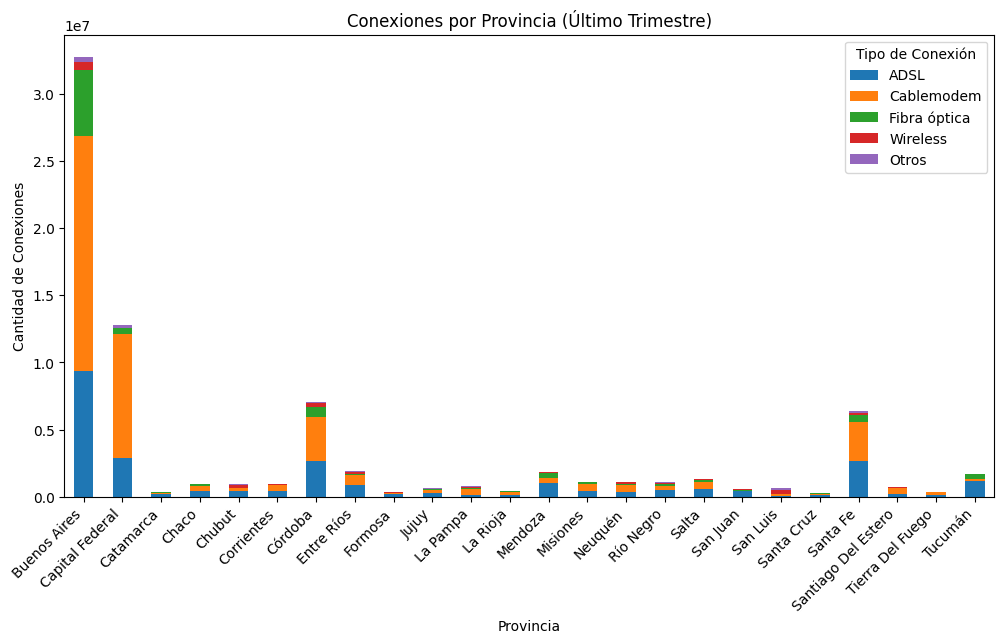

In [808]:
# Se filtra los registros del último trimestre de cada año
last_quarters = df_accesos_tecnologia_provincias[df_accesos_tecnologia_provincias['Trimestre'] == 4]

# Agrupar por 'Provincia' y calcular la suma de conexiones para cada tipo
grouped = last_quarters.groupby('Provincia').agg({'ADSL': 'sum', 'Cablemodem': 'sum', 'Fibra óptica': 'sum', 'Wireless': 'sum', 'Otros': 'sum'}).reset_index()

# Crear el gráfico de barras apiladas
ax = grouped.plot(x='Provincia', kind='bar', stacked=True, figsize=(12, 6))

# Personalizar el gráfico
plt.title('Conexiones por Provincia (Último Trimestre)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Conexión')

# Visualiza el grafico
plt.show()

Gráfico 2: 'Conexiones por Provincias Seleccionadas (Último Trimestre)

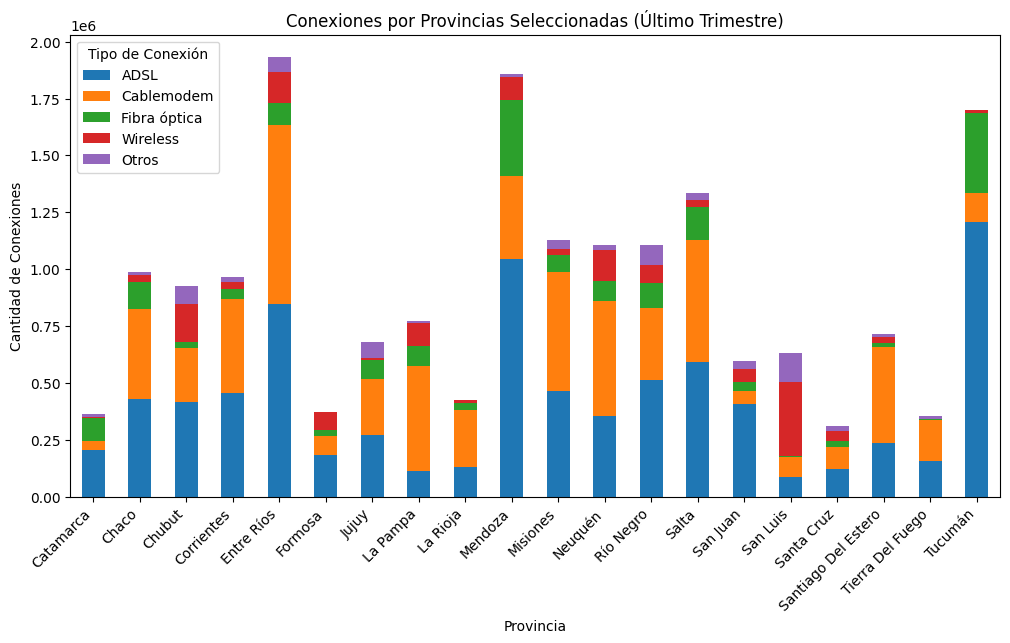

In [809]:
# Se filtra los registros del último trimestre de cada año
provincias_excluidas = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_filtered = last_quarters[~last_quarters['Provincia'].isin(provincias_excluidas)]

# Agrupar por 'Provincia' y calcular la suma de conexiones para cada tipo
grouped = df_filtered.groupby('Provincia').agg({'ADSL': 'sum', 'Cablemodem': 'sum', 'Fibra óptica': 'sum', 'Wireless': 'sum', 'Otros': 'sum'}).reset_index()

# Crear el gráfico de barras apiladas
ax = grouped.plot(x='Provincia', kind='bar', stacked=True, figsize=(12, 6))

# Personalizar el gráfico
plt.title('Conexiones por Provincias Seleccionadas (Último Trimestre)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Conexión')

# Visualiza el grafico
plt.show()

**df_rangos_velocidades_provincias**

En este caso, se optó por crear un nuevo dataframe, a partir del df_velocidad_localidad, que contenía la velocidad de los accesos a internet fijo por localidades, se decidió armar por rangos de velocidad de bajada (bajo, moderado y alto), nuevos registros, así como se agruparon según la provincia.

Para los gráficos se realizó dos gráficas del mismo tipo, la gráfica 1 considera a todas las provincias, y la gráfica 2 aquellas provincias con una menor cantidad de conexiones, para poder visualizar de mejor manera la distribución en cada una de ellas.

- Gráfico 1: Gráfico de barras apiladas (Conexiones de internet fijo por provincia)

    El gráfico de barras apiladas representa las cantidades totales de conexiones de internet fijo por provincia para el último trimestre del 2022. Estas barras están divididas por el rango de velocidad que tienen cada provincia y se diferencian por un color.

    Se puede visualizar una tendencia similar a los dos anteriores gráficos, al tener una mayor demografía ('Buenos Aires', 'Capital Federal', 'Córdoba' y 'Santa Fe') tienen una mayor cantidad de conexiones de internet fijo, la distribución de las velocidades si varía según la provincia, se puede visualizar que en 'Buenos Aires', 'Córdoba' y 'Santa Fe' predomina las conexiones con velocidad moderada, luego las conexiones con velocidad alta y baja son variables según la provincia.

    Respecto a 'Capital Federal' es la única provincia que tiene una cantidad similar de accesos con velocidades altas y moderadas.

- Gráfico 2: Gráfico de barras apiladas (Conexiones de internet fijo por provincias seleccionadas)

    El gráfico de barras apiladas representa las cantidades totales de conexiones de internet fijas por provincias (exceptuando 'Buenos Aires', 'Capital Federal', 'Córdoba' y 'Santa Fe') para el último trimestre del 2022. Estas barras están divididas por el tipo de conexión que tienen en la provincia y se diferencian por un color.

    Se puede visualizar que en este caso la distribución de las velocidades según las provincias, son variables de provincia a provincia, lo más resaltante de ello es la proporción de la velocidad alta respecto a las otras dos.

    Existen provincias como 'La Pampa', 'San Juan', 'Santa Cruz' y 'Tierra del Fuego' donde casi no hay velocidades altas de internet, y en su mayoría las conexiones son de velocidad baja, esto se debe a factores demográficos y geológicos que dificultan la instalación de redes de alta velocidad.
    

In [810]:
# Rangos por velocidad de bajada
df_velocidad_localidad['Rango_velocidad_baja (0-25 Mbps)'] = df_velocidad_localidad.iloc[:, 5:48].sum(axis=1)
df_velocidad_localidad['Rango_velocidad_moderada (25-100 Mbps)'] = df_velocidad_localidad.iloc[:, 48:88].sum(axis=1)
df_velocidad_localidad['Rango_velocidad_alta (100 a más Mbps)'] = df_velocidad_localidad.iloc[:, 88:133].sum(axis=1)

# Selección de columnas y se agrupa por provincias
df_rangos_velocidad_localidad = df_velocidad_localidad[['Provincia','Rango_velocidad_baja (0-25 Mbps)','Rango_velocidad_moderada (25-100 Mbps)', 'Rango_velocidad_alta (100 a más Mbps)','Otros','Total general']]
df_rangos_velocidades_provincias = df_rangos_velocidad_localidad.groupby('Provincia').sum()
df_rangos_velocidades_provincias = df_rangos_velocidades_provincias.reset_index()
df_rangos_velocidades_provincias.rename(columns={'index': 'Provincia'}, inplace=True)
provincias= pd.DataFrame(df_accesos_tecnologia_provincias['Provincia'].unique())
df_rangos_velocidades_provincias['Provincia'] = provincias
# Se visualiza el nuevo df
df_rangos_velocidades_provincias.head()

,Provincia,Rango_velocidad_baja (0-25 Mbps),Rango_velocidad_moderada (25-100 Mbps),Rango_velocidad_alta (100 a más Mbps),Otros,Total general
0,Buenos Aires,878749.0,2748989.0,1069293.0,97634.0,4794665.0
1,Capital Federal,140292.0,672965.0,631897.0,106772.0,1551926.0
2,Catamarca,14997.0,45417.0,8215.0,2280.0,70909.0
3,Chaco,42596.0,68957.0,28201.0,3909.0,143663.0
4,Chubut,121016.0,27690.0,27.0,20026.0,168759.0


Gráfico 1: 'Conexiones de Internet por Provincia y Rango de Velocidad'

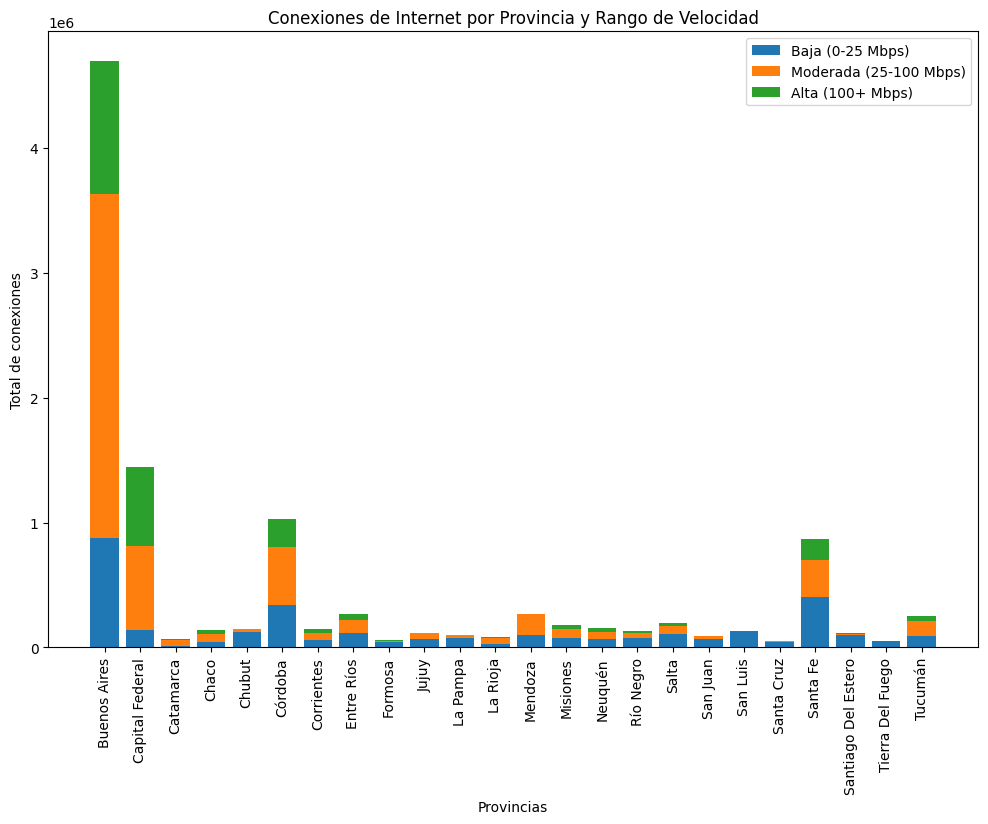

In [811]:
# Lista de provincias
provincias = df_rangos_velocidades_provincias['Provincia']

# Extracción de los rangos de velocidad
baja = df_rangos_velocidades_provincias['Rango_velocidad_baja (0-25 Mbps)']
moderada = df_rangos_velocidades_provincias['Rango_velocidad_moderada (25-100 Mbps)']
alta = df_rangos_velocidades_provincias['Rango_velocidad_alta (100 a más Mbps)']

# Datos totales
total = df_rangos_velocidades_provincias['Total general']

# Crea una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(provincias, baja, label='Baja (0-25 Mbps)')
ax.bar(provincias, moderada, label='Moderada (25-100 Mbps)', bottom=baja)
ax.bar(provincias, alta, label='Alta (100+ Mbps)', bottom=baja + moderada)

# Agrega etiquetas, título y leyenda
ax.set_xlabel('Provincias')
ax.set_ylabel('Total de conexiones')
ax.set_title('Conexiones de Internet por Provincia y Rango de Velocidad')
ax.legend()

# Visualiza el gráfico
plt.xticks(rotation=90)
plt.show()

Gráfico 2: 'Conexiones de Internet por Provincia y Rango de Velocidad (Excluyendo Buenos Aires, Capital Federal, Córdoba y Santa Fe)'

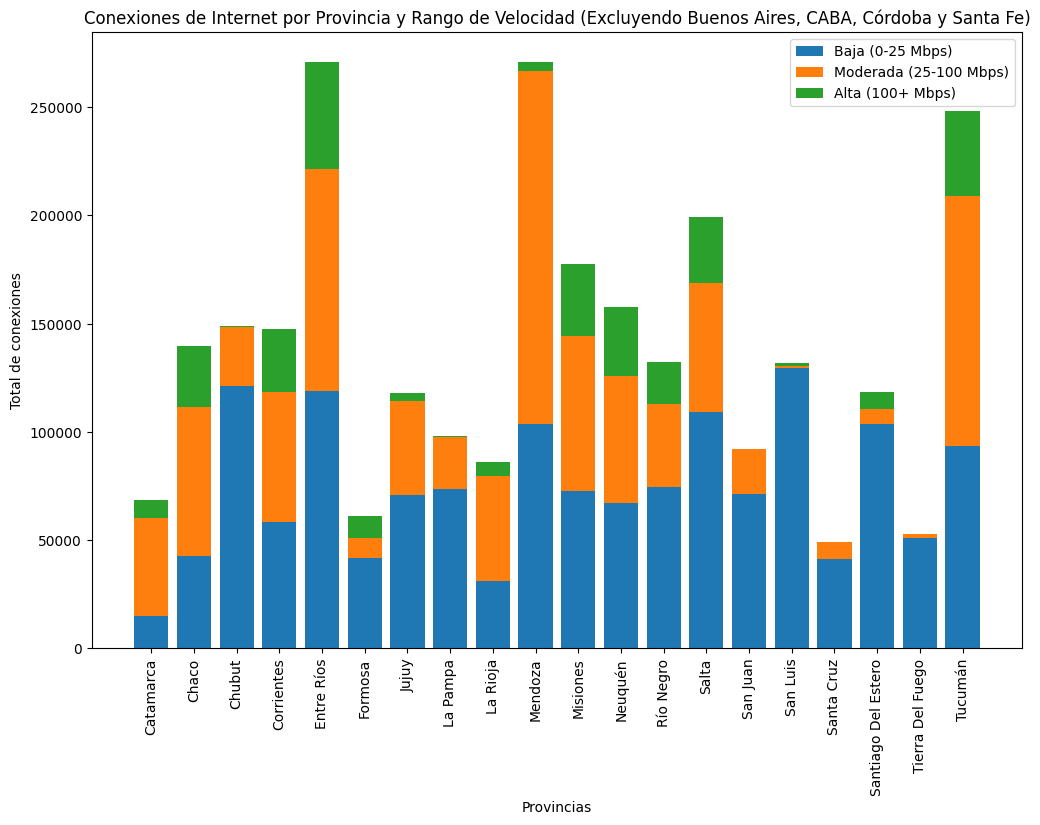

In [817]:
# Se filtran las provincias en una lista
provincias_filtradas = df_rangos_velocidades_provincias[~df_rangos_velocidades_provincias['Provincia'].isin(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe'])]
provincias = provincias_filtradas['Provincia']

# Extracción de los rangos de velocidad
baja = provincias_filtradas['Rango_velocidad_baja (0-25 Mbps)']
moderada = provincias_filtradas['Rango_velocidad_moderada (25-100 Mbps)']
alta = provincias_filtradas['Rango_velocidad_alta (100 a más Mbps)']

# Datos totales
total = provincias_filtradas['Total general']

# Crea una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(provincias, baja, label='Baja (0-25 Mbps)')
ax.bar(provincias, moderada, label='Moderada (25-100 Mbps)', bottom=baja)
ax.bar(provincias, alta, label='Alta (100+ Mbps)', bottom=baja + moderada)

# Agrega etiquetas, título y leyenda
ax.set_xlabel('Provincias')
ax.set_ylabel('Total de conexiones')
ax.set_title('Conexiones de Internet por Provincia y Rango de Velocidad (Excluyendo Buenos Aires, Capital Federal, Córdoba y Santa Fe)')
ax.legend()

# Visualiza el gráfico
plt.xticks(rotation=90)
plt.show()

Para los KPI's se decidió modificar lo siguiente en los dataframes:

In [813]:
# df_internet_fijo_provincias
# Se ordena los registros por provincia, año y trimestre
df_internet_fijo_provincias = df_internet_fijo_provincias.sort_values(by=['Provincia', 'Año', 'Trimestre'])
df_internet_fijo_provincias = df_internet_fijo_provincias.reset_index(drop=True)
# Se calcula el valor anterior y crear la nueva columna
df_internet_fijo_provincias['Accesos hogares -1'] = df_internet_fijo_provincias['Accesos por cada 100 hogares'].shift(1)
df_internet_fijo_provincias['Accesos hogares -1'].fillna(0, inplace=True)
# Se agrega el KPI para cada registro
df_internet_fijo_provincias['KPI'] = (df_internet_fijo_provincias['Accesos por cada 100 hogares']-df_internet_fijo_provincias['Accesos hogares -1'])/df_internet_fijo_provincias['Accesos hogares -1']*100
condicion = (df_internet_fijo_provincias['Año'] == 2014) & (df_internet_fijo_provincias['Trimestre'] == 1)
df_internet_fijo_provincias.loc[condicion, 'KPI'] = 0
df_internet_fijo_provincias.drop(columns=['Accesos hogares -1'],inplace=True)
df_internet_fijo_provincias.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,KPI
0,2014,1,Buenos Aires,54.570073,16.692346,0.000000
1,2014,2,Buenos Aires,55.061417,16.794925,0.900391
2,2014,3,Buenos Aires,56.754739,17.262998,3.075334
3,2014,4,Buenos Aires,56.094337,17.014763,-1.163608
4,2015,1,Buenos Aires,56.370484,17.241393,0.492292
5,2015,2,Buenos Aires,56.802806,17.325663,0.766928
6,2015,3,Buenos Aires,57.688681,17.547884,1.559563
7,2015,4,Buenos Aires,58.291822,17.683349,1.045510
8,2016,1,Buenos Aires,57.335908,17.535079,-1.639877
9,2016,2,Buenos Aires,59.338527,18.098685,3.492783


In [814]:
# df_accesos_tecnologia_nacional
# Se ordena los registros por provincia, año y trimestre
df_accesos_tecnologia_nacional = df_accesos_tecnologia_nacional.sort_values(by=['Año', 'Trimestre'])
df_accesos_tecnologia_nacional = df_accesos_tecnologia_nacional.reset_index(drop=True)
# Se calcula el valor anterior y crear la nueva columna
df_accesos_tecnologia_nacional['Fibra óptica -1'] = df_accesos_tecnologia_nacional['Fibra óptica'].shift(1)
df_accesos_tecnologia_nacional['Fibra óptica -1'].fillna(0, inplace=True)
# Se agrega el KPI para cada registro
df_accesos_tecnologia_nacional['KPI'] = (df_accesos_tecnologia_nacional['Fibra óptica']-df_accesos_tecnologia_nacional['Fibra óptica -1'])/df_accesos_tecnologia_nacional['Fibra óptica -1']*100
condicion = (df_accesos_tecnologia_nacional['Año'] == 2014) & (df_accesos_tecnologia_nacional['Trimestre'] == 1)
df_accesos_tecnologia_nacional.loc[condicion, 'KPI'] = 0
df_accesos_tecnologia_nacional.drop(columns=['Fibra óptica -1'],inplace=True)
# Al realizar las divisiones se forman valores nulos e infinitos
df_accesos_tecnologia_nacional['KPI'] = df_accesos_tecnologia_nacional['KPI'].replace([np.inf, -np.inf], 0)
df_accesos_tecnologia_nacional['KPI'] = df_accesos_tecnologia_nacional['KPI'].fillna(0)
df_accesos_tecnologia_nacional.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo,KPI
0,2014,1,3697066,2407330,150323,70749,72930,6398398,Ene-Mar 2014,0.000000
1,2014,2,3708882,2461670,149363,72405,72148,6464468,Abr-Jun 2014,-0.638625
2,2014,3,3714764,2569868,155494,85096,70049,6595271,Jul-Sept 2014,4.104765
3,2014,4,3764038,2536219,149682,76984,71573,6598496,Oct-Dic 2014,-3.737765
4,2015,1,3756153,2668248,168188,79098,66045,6737732,Ene-Mar 2015,12.363544
5,2015,2,3767821,2756294,150839,82077,59157,6816188,Abr-Jun 2015,-10.315242
6,2015,3,3788696,2840203,162663,84530,58976,6935068,Jul-Sept 2015,7.838822
7,2015,4,3803024,2898226,139187,85726,58668,6984831,Oct-Dic 2015,-14.432293
8,2016,1,3792493,2806359,164371,85370,58763,6907356,Ene-Mar 2016,18.093644
9,2016,2,3782085,3035272,167788,85452,59482,7130079,Abr-Jun 2016,2.078834


**CARGA DE LOS DATAFRAMES**

Se carga en archivos csv los dataframes seleccionados

In [815]:
df_internet_fijo_nacional.to_csv('Datasets/Data/Accesos_internet_fijo_nacional.csv', index=False, encoding='utf-8')
df_internet_fijo_provincias.to_csv('Datasets/Data/Accesos_internet_fijo_provincial.csv', index=False, encoding='utf-8')
df_accesos_tecnologia_nacional.to_csv('Datasets/Data/Accesos_tecnología_nacional.csv', index=False, encoding='utf-8')
df_accesos_tecnologia_provincias.to_csv('Datasets/Data/Accesos_tecnología_provincial.csv', index=False, encoding='utf-8')
df_rangos_velocidades_provincias.to_csv('Datasets/Data/Rangos_velocidades_provincial.csv', index=False, encoding='utf-8')
df_conectividad_internet_localidades.to_csv('Datasets/Data/Conectividad_internet_localidades.csv', index=False, encoding='utf-8')